In [1]:
import numpy as np  
import pandas as pd  

from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
data = pd.read_csv('./PG_2007_2017.csv', index_col = 'Date')

In [3]:
log_returns = np.log(1 + data.pct_change())

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [4]:
r = 0.025

In [5]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176109
dtype: float64

In [6]:
type(stdev)

pandas.core.series.Series

In [7]:
stdev = stdev.values
stdev

array([0.17610875])

In [8]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals 

iterations = 10000  

In [9]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [10]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [11]:
S

array([[ 88.118629  ,  88.118629  ,  88.118629  , ...,  88.118629  ,
         88.118629  ,  88.118629  ],
       [ 89.40415845,  87.45384747,  88.12269763, ...,  90.51273897,
         85.58145096,  85.42475654],
       [ 88.35804782,  86.72498205,  89.41694016, ...,  91.25858776,
         86.76541237,  86.34080031],
       ...,
       [ 92.94798452,  76.6283537 ,  95.03268016, ...,  97.43990881,
        103.3176764 ,  81.12552157],
       [ 93.30246963,  78.07925818,  93.9304222 , ...,  96.92513075,
        104.24353494,  79.73299129],
       [ 92.70411552,  78.76344508,  94.74392462, ...,  96.87732919,
        102.78159567,  79.62218215]])

In [12]:
S.shape

(251, 10000)

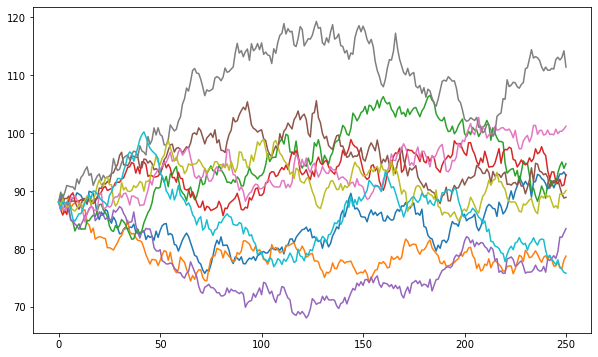

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);